# Stunting (5W 1H)

Kasus stunting menjadi momok yang harus dituntaskan dewasa ini. Stunting bahkan menjadi <b>salah satu fokus topik dalam Pemilihan Presiden 2024</b>, hal ini membuktikan bahwa stunting merupakan masalah bersama yang harus diatasi segera untuk menuju Indonesia Emas 2045.

### What?

<b>Apakah Stunting itu? </b> Stunting adalah kondisi yang ditandai dengan kurangnya tinggi badan anak apabila dibandingkan dengan anak-anak seusianya. Sederhananya, stunting merupakan sebutan bagi gangguan pertumbuhan pada anak. Penyebab utama dari stunting adalah kurangnya asupan nutrisi selama masa pertumbuhan anak. <br>
<br>

### Who?

<b>Siapakah yang dirugikan atas problematika ini?</b> Pihak yang dirugikan tentu saja utamanya adalah kanak-kanak. Pertumbuhan layak yang sehuarusnya mereka dapatkan melalui pemenuhan gizi dan nutrisi terkadang tidak terpenuhi dengan baik yang mengakibatkan pertumbuhan mengalami stunting. Hal ini menjadi rantai yang merugikan secara waktu karena ketika sudah besar nanti dan ada pekerjaan yang memiliki batas minimal tinggi maka anak-anak dengan kondisi stunting akan kesulitan dibanding anak tanpa stunting. Kehidupan layak, serta nutrisi sudah seharusnya mereka dapatkan sebagaimana mereka adalah penerus bangsa Indonesia.
<br>
<br>

### When?

<b>Kapan Stunting Menjadi Topik Hangat di Indonesia?</b> Stunting tentunya sudah dibicarakan dan digaungkan untuk anti-stunting sudah lama, aksi nyata dalam penurunan stunting oleh pemerintah diantaranya:
<lo>

<li>Pemberian TTD (Tablet Tambah Darah) bagi para remaja putri</li>
<li>Melakukan pemeriksaan kehamilan dan pemberian makanan tambahan pada ibu hamil guna mencukupi kandungan gizi dan zat besi pada ibu hamil.</li>
<li>Pemberian makanan tambahan berupa protein hewani pada anak usia 6-24 bulan seperti telur, ikan, ayam, daging dan susu.</li>
</lo>
<b>namun apakah data mengatakan penanganan tersebut efektif?</b>

### Why?

<b>Mengapa Stunting seperti tak kunjung usai?</b> banyak faktor yang memengaruhi hal ini, seperti:
<lo>

<li>Faktor struktural (ekonomi finansial, kemudahan akses terhadap layanan kesehatan, dan kualitas nutrisi)</li>
<li>Kurangnya koordinasi antar sektor</li>
<li>Kurang teredukasi perihal Stunting</li>
</lo>

### Where?

<b>Dimana stunting paling banyak terjadi?</b> Daerah dengan tingkat ekonomi cenderung rendah biasanya memiliki angka stunting tinggi, tidak lain karena pemenuhan gizi dan nutrisi yang berkualitas memerlukan biaya yang tidak sedikit.

### How?

<b>
    <lo>
        <li>Bagaimana dan seberapa efektif bantuan pemerintah selama ini? dan</li>
        <li>apakah langkah selanjutnya yang dapat dilakukan?</li>
    </lo>
</b> Bantuan diberikan cukup efektif dengan berdasar bukti penurunan stunting di Indonesia, namun apakah langkah selanjutnya, hanya dapat dilakukan berdasar data.


## Objective

<ol>
    <li>Seberapa efektif bantuan pemerintah?</li>
    <li>Apakah Kekayaan daerah berkorelasi dengan persentase stunting?</li>
    <li>Berdasarkan data persebaran stunting, prediksi perkembangannya pada 5 tahun mendatang setiap tahunnya?</li>
    <li>Dengan data training dan learning, kapan masalah stunting selesai?</li>
    <li>Prediksi persentase stunting pada 2045</li>
    <li>Kesimpulannya, apakah cara efektif menghadapi stunting? dan kapan dapat terselesaikan dengan cara paling efektif tersebut? </li>
</ol>


## Data Yang Diperlukan

<ol>
    <li style="color: yellow;">Sebaran Persentase Stunting</li>
    <li style="color: yellow;">Cakupan Layanan Pemerintah</li>
    <li style="color: yellow;">Daftar Desa Lokus Stunting</li>
    <li style="color: orange;">Tingkat Kemiskinan Indonesia</li>
</ol>
<br>
<ul>
    <li><b style="color: yellow;">Yellow</b> = Available on 'https://aksi.bangda.kemendagri.go.id/emonev/Dashboardmonev' -> default web</li>
    <li><b style="color: orange;">Orange</b> = Available on 'https://simreg.bappenas.go.id/home/pemantauan/tk' -> secondary web</li>
    <li><b style="color: red;">Red</b> = Not Available Yet</li>
</ul>
<br>
<lo>
    <li>Data 1 = Untuk melihat trend stunting di Indonesia secara keseluruhan dalam progress tahun </li>
    <li>Data 2 = Untuk melihat apa yang telah dilakukan pemerintah untuk menangani stunting guna kaitannya dengan dampak layanan terhadap trend stunting </li>
    <li>Data 3 = Untuk meninjau apakah program Desa Lokus dari pemerintah efektif dan memiliki dampak positif terhadap penanganan stunting secara signifikan</li>
    <li>Data 4 = Untuk mengetahui apakah terdapat korelasi antara finansial dengan stunting</li>
</lo>

## Importing Modules


In [6]:
# scrapping
import requests
from bs4 import BeautifulSoup as bs

# calculation
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy import stats
from scipy.stats import pearsonr
from statsmodels.tsa.arima.model import ARIMA

# visualisation
import matplotlib.pyplot as plt
import seaborn as sn
from PIL import Image

# Computer Directories
import os

# Data Scrapping


## Prevalensi Sebaran Stunting 2019 | 2023


### Data Stunting 2019


In [193]:
"""
The header of the table is doubling because the default table on web is hierarchical, 
the column 'STUNTING' has another 2 columns inside called "PENDEK && SANGAT PENDEK"
so the showed dataframe header seems like having double columns_name
"""

# reading data from url
url = "https://aksi.bangda.kemendagri.go.id/emonev/DashPrev/index/1"
response = requests.get(url, verify=False)

# Check if the request was successful
if response.status_code == 200:
    # Extract tables
    tables = pd.read_html(response.text)

    # Check if the tables list is empty
    if len(tables) > 0:
        # Select the first table from the list
        table = tables[0]

        # Create a new DataFrame
        stunting_2019 = pd.DataFrame(table)

    else:
        print("No tables found in the HTML content")
else:
    print("Failed to retrieve the webpage")

# display the data frame
stunting_2019.style.background_gradient(cmap="mako")

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aksi.bangda.kemendagri.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19588\3095834539.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


### Data Stunting 2023


In [194]:
# reading data from url
url = "https://aksi.bangda.kemendagri.go.id/emonev/DashPrev/index/5"
response = requests.get(url, verify=False)

# Check if the request was successful
if response.status_code == 200:
    # Extract tables
    tables = pd.read_html(response.text)

    # Check if the tables list is empty
    if len(tables) > 0:
        # Select the first table from the list
        table = tables[0]

        # Create a new DataFrame
        stunting_2023 = pd.DataFrame(table)

    else:
        print("No tables found in the HTML content")
else:
    print("Failed to retrieve the webpage")

# display the data frame
stunting_2023.style.background_gradient(cmap="mako")

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aksi.bangda.kemendagri.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19588\2930422740.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


## Cakupan Layanan Pemerintah 2019 | 2023


### Data Cakupan Layanan 2019


In [195]:
# reading data from url
url = "https://aksi.bangda.kemendagri.go.id/emonev/DashCakupan/index/1"
response = requests.get(url, verify=False)

# Check if the request was successful
if response.status_code == 200:
    # Extract tables
    tables = pd.read_html(response.text)

    # Check if the tables list is empty
    if len(tables) > 0:
        # Select the first table from the list
        table = tables[0]

        # Create a new DataFrame
        cakupan_layanan_2019 = pd.DataFrame(table)

    else:
        print("No tables found in the HTML content")
else:
    print("Failed to retrieve the webpage")

# display the data frame
cakupan_layanan_2019.style.background_gradient(cmap="mako")

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aksi.bangda.kemendagri.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19588\4207681913.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


### Data Cakupan Layanan 2023


In [196]:
# reading data from url
url = "https://aksi.bangda.kemendagri.go.id/emonev/DashCakupan/index/5"
response = requests.get(url, verify=False)

# Check if the request was successful
if response.status_code == 200:
    # Extract tables
    tables = pd.read_html(response.text)

    # Check if the tables list is empty
    if len(tables) > 0:
        # Select the first table from the list
        table = tables[0]

        # Create a new DataFrame
        cakupan_layanan_2023 = pd.DataFrame(table)

    else:
        print("No tables found in the HTML content")
else:
    print("Failed to retrieve the webpage")

# display the data frame
cakupan_layanan_2023.style.background_gradient(cmap="mako")

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aksi.bangda.kemendagri.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19588\4293253120.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


## Cakupan Desa Lokus 2019 | 2023

<p><b>Desa lokus stunting adalah</b> lokasi yang ditetapkan sebagai fokus dalam program penanganan stunting, biasanya karena memiliki tingkat stunting yang lebih tinggi dibandingkan dengan wilayah lain. Desa lokus stunting ini ditargetkan untuk menerima intervensi khusus dan intensif untuk mengurangi angka stunting di wilayah tersebut. Intervensi ini dapat berupa pemberian makanan tambahan, imunisasi, dan pendidikan tentang gizi yang lebih baik, serta peran aktif dari orang tua dalam memantau dan memperbaiki asupan gizi anak-anak di desa tersebut


### Cakupan Desa Lokus 2019


In [197]:
# reading data from url
url = "https://aksi.bangda.kemendagri.go.id/emonev/DashDesaLokus/index/1"
response = requests.get(url, verify=False)

# Check if the request was successful
if response.status_code == 200:
    # Extract tables
    tables = pd.read_html(response.text)

    # Check if the tables list is empty
    if len(tables) > 0:
        # Select the first table from the list
        table = tables[0]

        # Create a new DataFrame
        desa_lokus_2019 = pd.DataFrame(table)

    else:
        print("No tables found in the HTML content")
else:
    print("Failed to retrieve the webpage")

# display the data frame
desa_lokus_2019.style.background_gradient(cmap="mako")

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aksi.bangda.kemendagri.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19588\3563945122.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


### Desa Lokus 2023


In [198]:
# reading data from url
url = "https://aksi.bangda.kemendagri.go.id/emonev/DashDesaLokus/index/5"
response = requests.get(url, verify=False)

# Check if the request was successful
if response.status_code == 200:
    # Extract tables
    tables = pd.read_html(response.text)

    # Check if the tables list is empty
    if len(tables) > 0:
        # Select the first table from the list
        table = tables[0]

        # Create a new DataFrame
        desa_lokus_2023 = pd.DataFrame(table)

    else:
        print("No tables found in the HTML content")
else:
    print("Failed to retrieve the webpage")

# display the data frame
desa_lokus_2019.style.background_gradient(cmap="mako")

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'aksi.bangda.kemendagri.go.id'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19588\1361338112.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


## Pravelensi Penduduk Miskin 2019 | 2023


In [199]:
persentase_kemiskinan = pd.read_csv("Persentase Penduduk Miskin BAPPENAS.csv", sep=";")
persentase_kemiskinan

,No.,Provinsi,Persentase Penduduk Miskin 2019 (September),Persentase Penduduk Miskin 2020 (September),Persentase Penduduk Miskin 2021 (September),Persentase Penduduk Miskin 2022 (September),Persentase Penduduk Miskin 2023 (Maret)
0,1,Provinsi Aceh,"15,01","15,43","15,53","14,75","14,45"
1,2,Provinsi Sumatera Utara,"8,63","9,14","8,49","8,33","8,15"
2,3,Provinsi Sumatera Barat,"6,29","6,56","6,04","6,04","5,95"
3,4,Provinsi Riau,"6,9","7,04",7,"6,84","6,68"
4,5,Provinsi Jambi,"7,51","7,97","7,67","7,7","7,58"
5,6,Provinsi Sumatera Selatan,"12,56","12,98","12,79","11,95","11,78"
6,7,Provinsi Bengkulu,"14,91","15,3","14,43","14,34","14,04"
7,8,Provinsi Lampung,"12,3","12,76","11,67","11,44","11,11"
8,9,Provinsi Kepulauan Bangka Belitung,"4,5","4,89","4,67","4,61","4,562"
9,10,Provinsi Kepulauan Riau,"5,8","6,13","5,75","6,03","5,69"


In [200]:
persentase_kemiskinan.columns

Index(['No.', 'Provinsi', 'Persentase Penduduk Miskin 2019 (September)',
       'Persentase Penduduk Miskin 2020 (September)',
       'Persentase Penduduk Miskin 2021 (September)',
       'Persentase Penduduk Miskin 2022 (September)',
       'Persentase Penduduk Miskin 2023 (Maret)'],
      dtype='object')

In [201]:
# change all the value on percentage column into float data type
persentase_kemiskinan["Persentase Penduduk Miskin 2019 (September)"] = (
    persentase_kemiskinan["Persentase Penduduk Miskin 2019 (September)"]
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)
persentase_kemiskinan["Persentase Penduduk Miskin 2020 (September)"] = (
    persentase_kemiskinan["Persentase Penduduk Miskin 2020 (September)"]
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)
persentase_kemiskinan["Persentase Penduduk Miskin 2021 (September)"] = (
    persentase_kemiskinan["Persentase Penduduk Miskin 2021 (September)"]
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)
persentase_kemiskinan["Persentase Penduduk Miskin 2022 (September)"] = (
    persentase_kemiskinan["Persentase Penduduk Miskin 2022 (September)"]
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)
persentase_kemiskinan["Persentase Penduduk Miskin 2023 (Maret)"] = (
    persentase_kemiskinan["Persentase Penduduk Miskin 2023 (Maret)"]
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)

persentase_kemiskinan.style.background_gradient(cmap="mako")

,No.,Provinsi,Persentase Penduduk Miskin 2019 (September),Persentase Penduduk Miskin 2020 (September),Persentase Penduduk Miskin 2021 (September),Persentase Penduduk Miskin 2022 (September),Persentase Penduduk Miskin 2023 (Maret)
0,1,Provinsi Aceh,15.010000,15.430000,15.530000,14.750000,14.450000
1,2,Provinsi Sumatera Utara,8.630000,9.140000,8.490000,8.330000,8.150000
2,3,Provinsi Sumatera Barat,6.290000,6.560000,6.040000,6.040000,5.950000
3,4,Provinsi Riau,6.900000,7.040000,7.000000,6.840000,6.680000
4,5,Provinsi Jambi,7.510000,7.970000,7.670000,7.700000,7.580000
5,6,Provinsi Sumatera Selatan,12.560000,12.980000,12.790000,11.950000,11.780000
6,7,Provinsi Bengkulu,14.910000,15.300000,14.430000,14.340000,14.040000
7,8,Provinsi Lampung,12.300000,12.760000,11.670000,11.440000,11.110000
8,9,Provinsi Kepulauan Bangka Belitung,4.500000,4.890000,4.670000,4.610000,4.562000
9,10,Provinsi Kepulauan Riau,5.800000,6.130000,5.750000,6.030000,5.690000


## 1. Efektivitas Bantuan Pemerintah Untuk Mengurangi Stunting


In [202]:
# Check the column names in the DataFrame
print(stunting_2019.columns)

MultiIndex([(                           'No',                            'No'),
            (                     'Provinsi',                      'Provinsi'),
            (         'Jumlah Balita (anak)',          'Jumlah Balita (anak)'),
            (                     'Stunting',                 'Pendek (anak)'),
            (                     'Stunting',          'Sangat Pendek (anak)'),
            ('Persentase Kasus Stunting (%)', 'Persentase Kasus Stunting (%)')],
           )


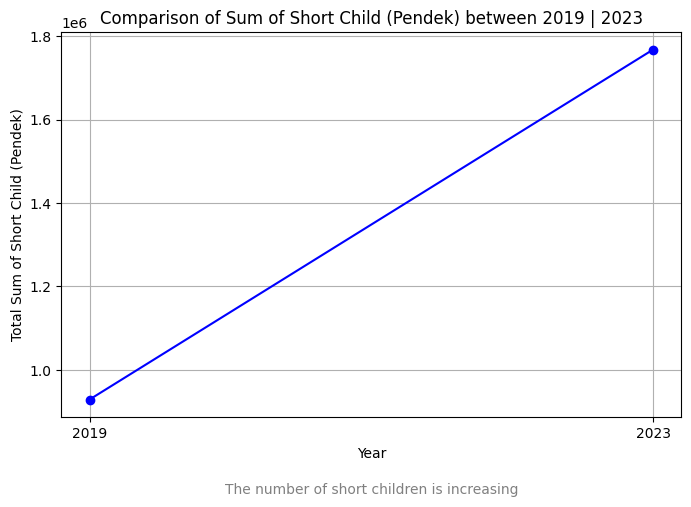

In [203]:
# Define the data
years = ["2019", "2023"]

# Sum the values of "Pendek (anak)" for each year
total_stunting_pendek = [
    stunting_2019[("Stunting", "Pendek (anak)")].sum(),
    stunting_2023[("Stunting", "Pendek (anak)")].sum(),
]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(years, total_stunting_pendek, marker="o", color="blue", linestyle="-")

# Adding labels and title
plt.title("Comparison of Sum of Short Child (Pendek) between 2019 | 2023")
plt.xlabel("Year")
plt.ylabel("Total Sum of Short Child (Pendek)")

# Add a caption
plt.text(
    0.5,
    -0.2,
    "The number of short children is increasing",
    ha="center",
    transform=plt.gca().transAxes,
    fontsize=10,
    color="gray",
)

# Show the plot
plt.grid(True)
plt.show()

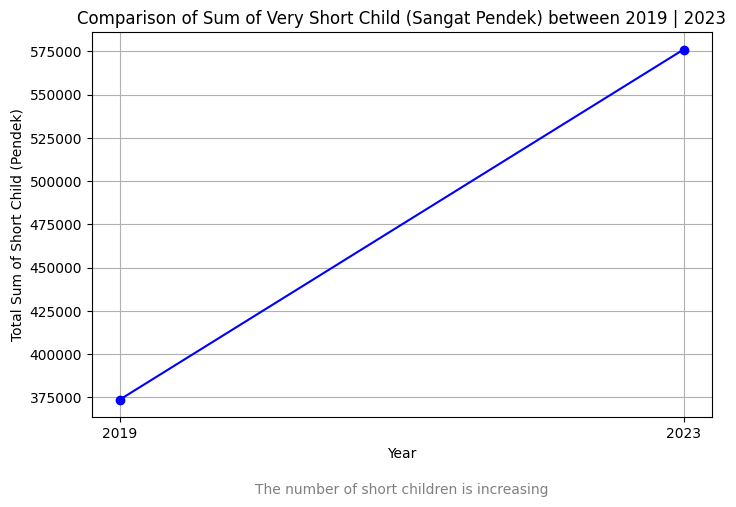

In [204]:
# Define the data
years = ["2019", "2023"]

# Sum the values of "Pendek (anak)" for each year
total_stunting_sangat_pendek = [
    stunting_2019[("Stunting", "Sangat Pendek (anak)")].sum(),
    stunting_2023[("Stunting", "Sangat Pendek (anak)")].sum(),
]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(years, total_stunting_sangat_pendek, marker="o", color="blue", linestyle="-")

# Adding labels and title
plt.title("Comparison of Sum of Very Short Child (Sangat Pendek) between 2019 | 2023")
plt.xlabel("Year")
plt.ylabel("Total Sum of Short Child (Pendek)")

# Add a caption
plt.text(
    0.5,
    -0.2,
    "The number of short children is increasing",
    ha="center",
    transform=plt.gca().transAxes,
    fontsize=10,
    color="gray",
)

# Show the plot
plt.grid(True)
plt.show()

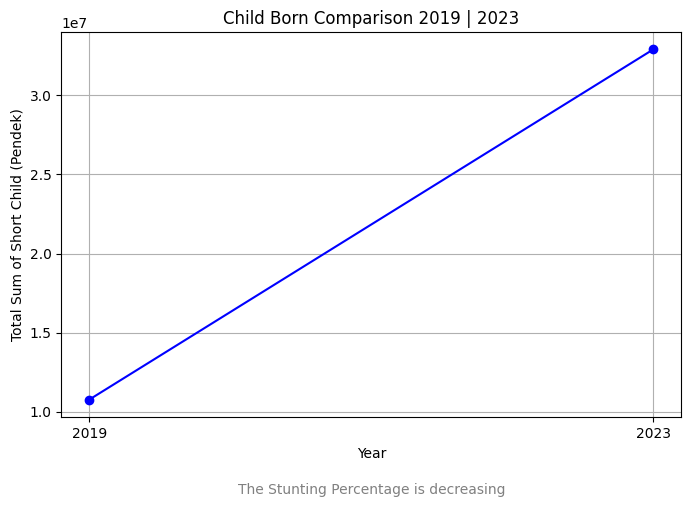

In [205]:
# Define the data
years = ["2019", "2023"]

# Sum the values of "Pendek (anak)" for each year
kelahiran = [
    stunting_2019[("Jumlah Balita (anak)", "Jumlah Balita (anak)")].sum(),
    stunting_2023[("Jumlah Balita (anak)", "Jumlah Balita (anak)")].sum(),
]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(years, kelahiran, marker="o", color="blue", linestyle="-")

# Adding labels and title
plt.title("Child Born Comparison 2019 | 2023")
plt.xlabel("Year")
plt.ylabel("Total Sum of Short Child (Pendek)")

# Add a caption
plt.text(
    0.5,
    -0.2,
    "The Stunting Percentage is decreasing",
    ha="center",
    transform=plt.gca().transAxes,
    fontsize=10,
    color="gray",
)

# Show the plot
plt.grid(True)
plt.show()

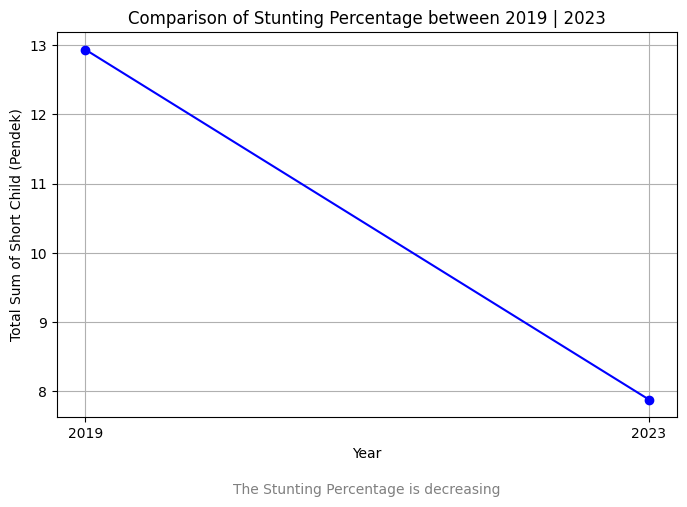

In [206]:
# Define the data
years = ["2019", "2023"]

# Sum the values of "Pendek (anak)" for each year
komparasi_stunting = [
    stunting_2019[
        ("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)")
    ].mean(),
    stunting_2023[
        ("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)")
    ].mean(),
]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(years, komparasi_stunting, marker="o", color="blue", linestyle="-")

# Adding labels and title
plt.title("Comparison of Stunting Percentage between 2019 | 2023")
plt.xlabel("Year")
plt.ylabel("Total Sum of Short Child (Pendek)")

# Add a caption
plt.text(
    0.5,
    -0.2,
    "The Stunting Percentage is decreasing",
    ha="center",
    transform=plt.gca().transAxes,
    fontsize=10,
    color="gray",
)

# Show the plot
plt.grid(True)
plt.show()

#### Insight 1


From the Data shown before, we already know that the government support is given in the shape of many things. In 2023 it is even better because the support is already segmented for:

<ol>
    <li>REMAJA</li>
    <li>CALON PENGANTIN / PASANGAN USIA SUBUR</li>
    <li>IBU HAMIL</li>
    <li>BALITA</li>
    <li>KELUARGA BERESIKO</li>
    <li>AIR MINUM DAN SANITASI</li>
    <li>PERLINDUNGAN SOSIAL</li>
</ol>

unlike on the 2019 year, which the support is still general. It just show how the government increase their standart toward this issue, and even with "unsegmented support" it still has a good impact to decrease and prevent stunting.

<p style="color: orange">It seems that if we see from kids body height, it looks like it's decreasing but the percentage of Stunting is decreasing how this could happen?</p>
<u>It is basically because of Ratio of Child Born and Stunting Data.</u> When the Child Born variable is increase the stunting sum is also increase, this mean both of this variable is grow together and we cannot really see the Born and Stunting body height as a comparison. The height seems decrease which mean one kind of stunting symptoms, but in facts from overall data, we can see that the percentage of Stunting is actually still decreasing. So the support from government is still affecting well and has a good efectivities. <b style="color: green;">Giving impact decreasing from 13% to 8% in 4 years by mean</b>


### Check Column Names


In [207]:
# Check the column names in the DataFrame
print(stunting_2019.columns)

MultiIndex([(                           'No',                            'No'),
            (                     'Provinsi',                      'Provinsi'),
            (         'Jumlah Balita (anak)',          'Jumlah Balita (anak)'),
            (                     'Stunting',                 'Pendek (anak)'),
            (                     'Stunting',          'Sangat Pendek (anak)'),
            ('Persentase Kasus Stunting (%)', 'Persentase Kasus Stunting (%)')],
           )


In [208]:
# Check the column names in the DataFrame
print(stunting_2023.columns)

MultiIndex([(                           'No',                            'No'),
            (                     'Provinsi',                      'Provinsi'),
            (         'Jumlah Balita (anak)',          'Jumlah Balita (anak)'),
            (                     'Stunting',                 'Pendek (anak)'),
            (                     'Stunting',          'Sangat Pendek (anak)'),
            ('Persentase Kasus Stunting (%)', 'Persentase Kasus Stunting (%)')],
           )


In [209]:
# Check the column names in the DataFrame
print(desa_lokus_2019.columns)

MultiIndex([(      'No',       'No'),
            ('Provinsi', 'Provinsi'),
            (   'Tahun', 'Berjalan'),
            (   'Tahun',  'Rencana')],
           )


In [210]:
# Check the column names in the DataFrame
print(desa_lokus_2023.columns)

MultiIndex([(      'No',       'No'),
            ('Provinsi', 'Provinsi'),
            (   'Tahun', 'Berjalan'),
            (   'Tahun',  'Rencana')],
           )


### Komparasi Presentase Stunting dengan Cakupan Desa Lokus Kalimantan Utara


#### Persentase Stunting Kalimantan Utara 2019


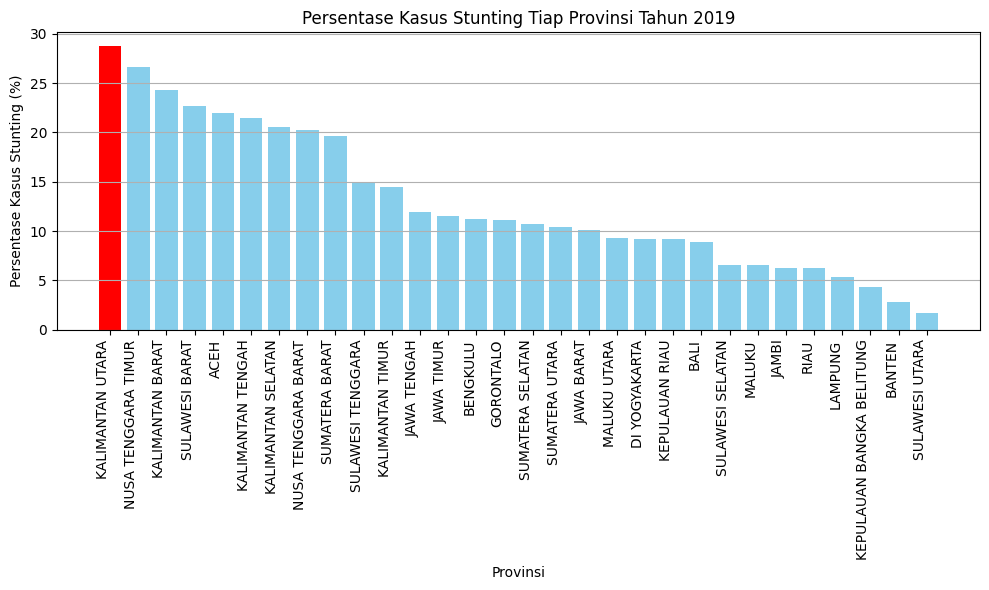

In [211]:
# Drop rows with missing values in the 'Persentase Kasus Stunting (%)' column
stunting_2019.dropna(
    subset=[("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)")],
    inplace=True,
)

# Ensure 'Provinsi' column is in the correct format
stunting_2019[("Provinsi", "Provinsi")] = stunting_2019[
    ("Provinsi", "Provinsi")
].astype(str)

# Sort the DataFrame by the values in the column 'Persentase Kasus Stunting (%)', in descending order
stunting_2019_sorted = stunting_2019.iloc[:-1].sort_values(
    by=("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)"),
    ascending=False,
)

# Find the index of Kalimantan Utara
kalimantan_utara_index_stunting_2019 = (
    stunting_2019_sorted[("Provinsi", "Provinsi")].tolist().index("KALIMANTAN UTARA")
)

# Create a list of colors
colors = ["skyblue"] * len(stunting_2019_sorted)
# Set the color of the Kalimantan Utara bar to red
colors[kalimantan_utara_index_stunting_2019] = "red"

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(
    stunting_2019_sorted[("Provinsi", "Provinsi")],
    stunting_2019_sorted[
        ("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)")
    ],
    color=colors,
)
plt.title("Persentase Kasus Stunting Tiap Provinsi Tahun 2019")
plt.xlabel("Provinsi")
plt.ylabel("Persentase Kasus Stunting (%)")
plt.xticks(rotation="vertical", ha="right")
plt.grid(axis="y", linestyle="-")
plt.tight_layout()
plt.show()

### Persentase Stunting Kalimantan Utara 2023


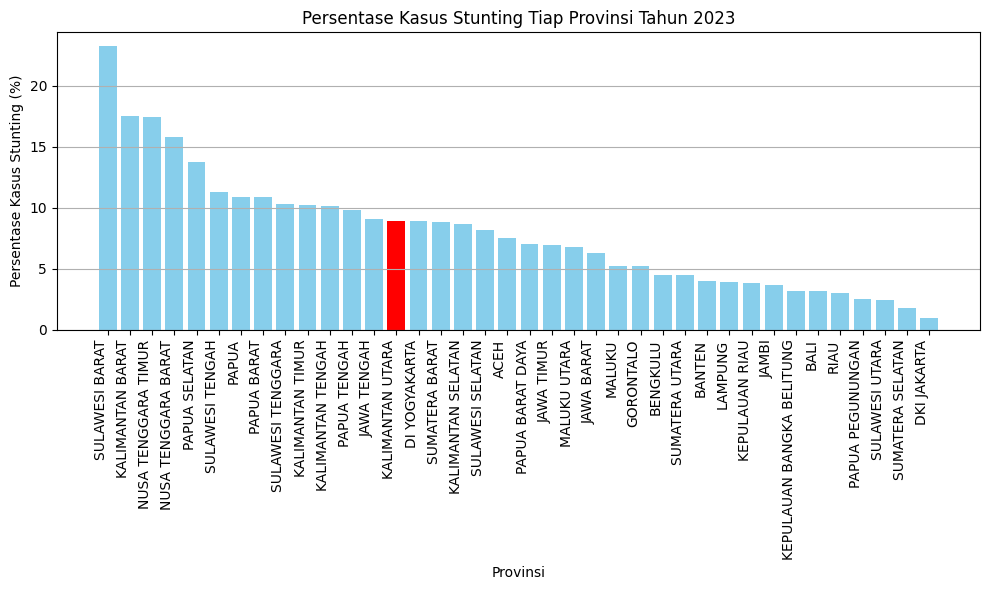

In [212]:
# Drop rows with missing values in the 'Persentase Kasus Stunting (%)' column
stunting_2023.dropna(
    subset=[("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)")],
    inplace=True,
)

# Ensure 'Provinsi' column is in the correct format
stunting_2023[("Provinsi", "Provinsi")] = stunting_2023[
    ("Provinsi", "Provinsi")
].astype(str)

# Sort the DataFrame by the values in the column 'Persentase Kasus Stunting (%)', in descending order
stunting_2023_sorted = stunting_2023.iloc[:-1].sort_values(
    by=("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)"),
    ascending=False,
)

# Find the index of Kalimantan Utara
kalimantan_utara_index_stunting_2023 = (
    stunting_2023_sorted[("Provinsi", "Provinsi")].tolist().index("KALIMANTAN UTARA")
)

# Create a list of colors
colors = ["skyblue"] * len(stunting_2023_sorted)
# Set the color of the Kalimantan Utara bar to red
colors[kalimantan_utara_index_stunting_2023] = "red"

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(
    stunting_2023_sorted[("Provinsi", "Provinsi")],
    stunting_2023_sorted[
        ("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)")
    ],
    color=colors,
)
plt.title("Persentase Kasus Stunting Tiap Provinsi Tahun 2023")
plt.xlabel("Provinsi")
plt.ylabel("Persentase Kasus Stunting (%)")
plt.xticks(rotation="vertical", ha="right")
plt.grid(axis="y", linestyle="-")
plt.tight_layout()
plt.show()

### Desa Lokus Kalimantan Utara 2019


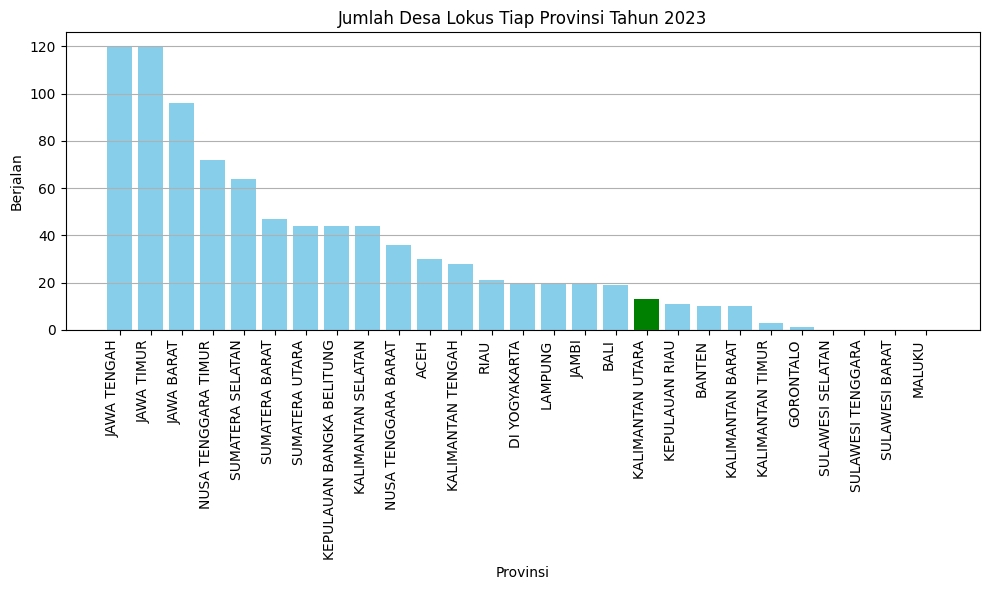

In [213]:
# Drop rows with missing values in the 'Persentase Kasus Stunting (%)' column
desa_lokus_2019.dropna(subset=[("Tahun", "Berjalan")], inplace=True)

# Ensure 'Provinsi' column is in the correct format
desa_lokus_2019[("Provinsi", "Provinsi")] = desa_lokus_2019[
    ("Provinsi", "Provinsi")
].astype(str)

# Sort the DataFrame by the values in the column 'Berjalan', in descending order
stunting_2023_sorted = desa_lokus_2019.iloc[:-1].sort_values(
    by=("Tahun", "Berjalan"), ascending=False
)

# Find the index of Kalimantan Utara
kalimantan_utara_index_stunting_2023 = (
    stunting_2023_sorted[("Provinsi", "Provinsi")].tolist().index("KALIMANTAN UTARA")
)

# Create a list of colors
colors = ["skyblue"] * len(stunting_2023_sorted)
# Set the color of the Kalimantan Utara bar to red
colors[kalimantan_utara_index_stunting_2023] = "green"

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(
    stunting_2023_sorted[("Provinsi", "Provinsi")],
    stunting_2023_sorted[("Tahun", "Berjalan")],
    color=colors,
)
plt.title("Jumlah Desa Lokus Tiap Provinsi Tahun 2023")
plt.xlabel("Provinsi")
plt.ylabel("Berjalan")
plt.xticks(rotation="vertical", ha="right")
plt.grid(axis="y", linestyle="-")
plt.tight_layout()
plt.show()

In [214]:
desa_lokus_kalimantan_utara_2019 = desa_lokus_2019.loc[
    desa_lokus_2019[("Provinsi", "Provinsi")] == "KALIMANTAN UTARA"
]
desa_lokus_kalimantan_utara_2019

No          Provinsi    Tahun        
    No          Provinsi Berjalan Rencana
21  22  KALIMANTAN UTARA       13      43

### Desa Lokus Kalimantan Utara 2023


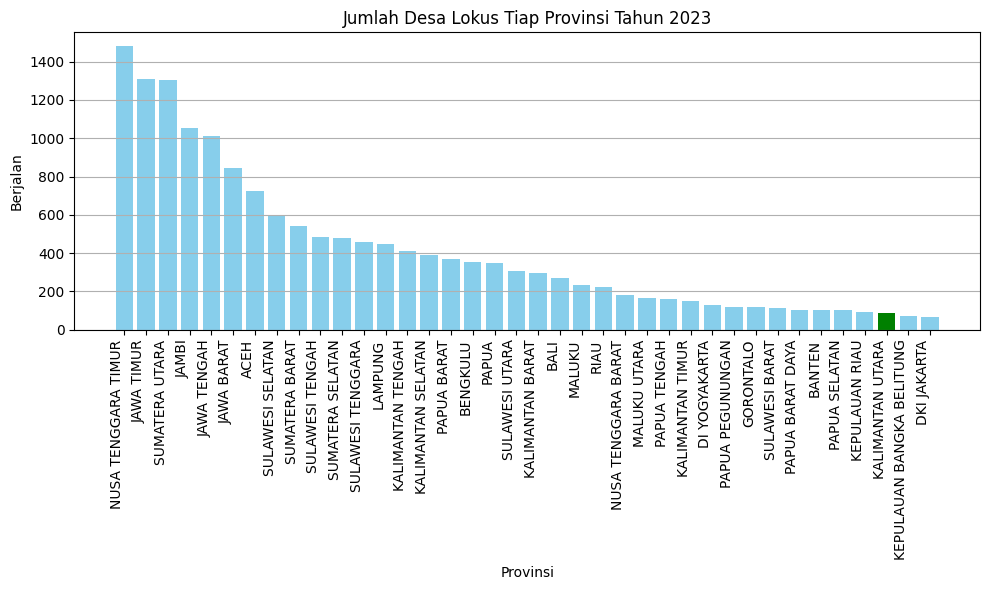

In [215]:
# Drop rows with missing values in the 'Persentase Kasus Stunting (%)' column
desa_lokus_2023.dropna(subset=[("Tahun", "Berjalan")], inplace=True)

# Ensure 'Provinsi' column is in the correct format
desa_lokus_2023[("Provinsi", "Provinsi")] = desa_lokus_2023[
    ("Provinsi", "Provinsi")
].astype(str)

# Sort the DataFrame by the values in the column 'Berjalan', in descending order
stunting_2023_sorted = desa_lokus_2023.iloc[:-1].sort_values(
    by=("Tahun", "Berjalan"), ascending=False
)

# Find the index of Kalimantan Utara
kalimantan_utara_index_stunting_2023 = (
    stunting_2023_sorted[("Provinsi", "Provinsi")].tolist().index("KALIMANTAN UTARA")
)

# Create a list of colors
colors = ["skyblue"] * len(stunting_2023_sorted)
# Set the color of the Kalimantan Utara bar to red
colors[kalimantan_utara_index_stunting_2023] = "green"

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(
    stunting_2023_sorted[("Provinsi", "Provinsi")],
    stunting_2023_sorted[("Tahun", "Berjalan")],
    color=colors,
)
plt.title("Jumlah Desa Lokus Tiap Provinsi Tahun 2023")
plt.xlabel("Provinsi")
plt.ylabel("Berjalan")
plt.xticks(rotation="vertical", ha="right")
plt.grid(axis="y", linestyle="-")
plt.tight_layout()
plt.show()

In [216]:
desa_lokus_kalimantan_utara_2023 = desa_lokus_2023.loc[
    desa_lokus_2023[("Provinsi", "Provinsi")] == "KALIMANTAN UTARA"
]
desa_lokus_kalimantan_utara_2023

No          Provinsi    Tahun        
    No          Provinsi Berjalan Rencana
23  24  KALIMANTAN UTARA       85      51

### Dampak Desa Lokus Dalam Perspektif Perbandingan 2019 | 2023 Terhadap Kasus Stunting


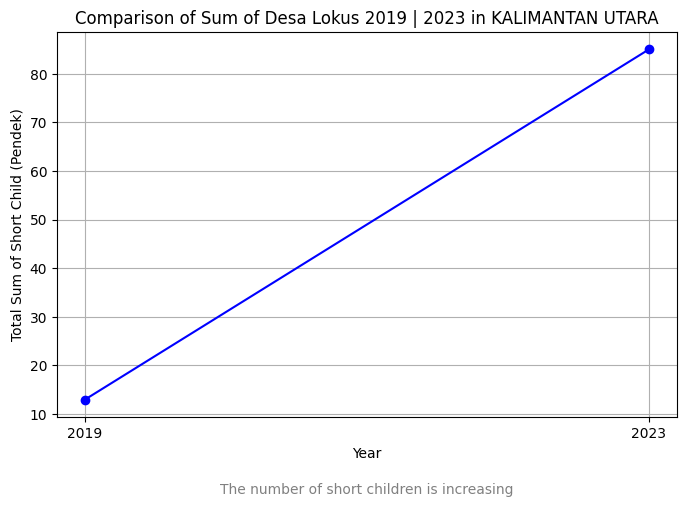

In [217]:
# Define the data
years = ["2019", "2023"]

# Sum the values of "Pendek (anak)" for each year
dampak_desa_lokus = [
    desa_lokus_kalimantan_utara_2019[("Tahun", "Berjalan")].sum(),
    desa_lokus_kalimantan_utara_2023[("Tahun", "Berjalan")].sum(),
]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(years, dampak_desa_lokus, marker="o", color="blue", linestyle="-")

# Adding labels and title
plt.title("Comparison of Sum of Desa Lokus 2019 | 2023 in KALIMANTAN UTARA")
plt.xlabel("Year")
plt.ylabel("Total Sum of Short Child (Pendek)")

# Add a caption
plt.text(
    0.5,
    -0.2,
    "The number of short children is increasing",
    ha="center",
    transform=plt.gca().transAxes,
    fontsize=10,
    color="gray",
)

# Show the plot
plt.grid(True)
plt.show()

In [218]:
kalimantan_utara_data_stunting_2019 = stunting_2019.loc[
    stunting_2019[("Provinsi", "Provinsi")] == "KALIMANTAN UTARA",
    ("Persentase Kasus Stunting (%)"),
]
print(
    "Persentase Kasus Stunting di Kalimantan Utara Tahun 2019: ",
    kalimantan_utara_data_stunting_2019.values[0],
    "%",
)  # values zero for avoiding printing index row numbers

kalimantan_utara_data_stunting_2023 = stunting_2023.loc[
    stunting_2023[("Provinsi", "Provinsi")] == "KALIMANTAN UTARA",
    ("Persentase Kasus Stunting (%)"),
]
print(
    "Persentase Kasus Stunting di Kalimantan Utara Tahun 2023: ",
    kalimantan_utara_data_stunting_2023.values[0],
    "%",
)  # values zero for avoiding printing index row numbers

Persentase Kasus Stunting di Kalimantan Utara Tahun 2019:  [28.7] %
Persentase Kasus Stunting di Kalimantan Utara Tahun 2023:  [8.9] %


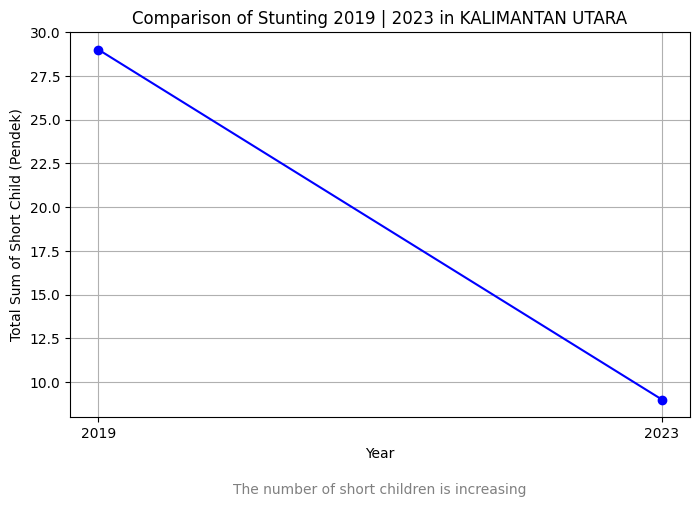

In [219]:
# Define the data
years = ["2019", "2023"]
kalimantan_utara_data_stunting = ["29", "9"]

# Convert stunting data to numeric values
kalimantan_utara_data_stunting_numeric = [
    float(value) for value in kalimantan_utara_data_stunting
]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(
    years,
    kalimantan_utara_data_stunting_numeric,
    marker="o",
    color="blue",
    linestyle="-",
)

# Adding labels and title
plt.title("Comparison of Stunting 2019 | 2023 in KALIMANTAN UTARA")
plt.xlabel("Year")
plt.ylabel("Total Sum of Short Child (Pendek)")

# Add a caption
plt.text(
    0.5,
    -0.2,
    "The number of short children is increasing",
    ha="center",
    transform=plt.gca().transAxes,
    fontsize=10,
    color="gray",
)

# Show the plot
plt.grid(True)
plt.show()

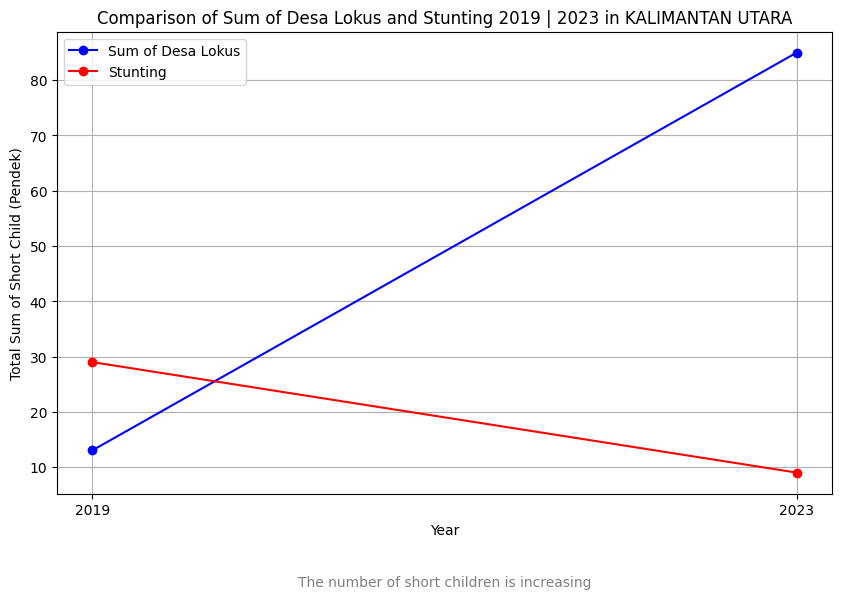

In [220]:
# Define the data
years = ["2019", "2023"]

# Data for Sum of Desa Lokus
dampak_desa_lokus = [
    desa_lokus_kalimantan_utara_2019[("Tahun", "Berjalan")].sum(),
    desa_lokus_kalimantan_utara_2023[("Tahun", "Berjalan")].sum(),
]

# Data for Stunting
kalimantan_utara_data_stunting = ["29", "9"]
kalimantan_utara_data_stunting_numeric = [
    float(value) for value in kalimantan_utara_data_stunting
]

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot for Sum of Desa Lokus
plt.plot(
    years,
    dampak_desa_lokus,
    marker="o",
    color="blue",
    linestyle="-",
    label="Sum of Desa Lokus",
)

# Plot for Stunting
plt.plot(
    years,
    kalimantan_utara_data_stunting_numeric,
    marker="o",
    color="red",
    linestyle="-",
    label="Stunting",
)

# Adding labels and title
plt.title(
    "Comparison of Sum of Desa Lokus and Stunting 2019 | 2023 in KALIMANTAN UTARA"
)
plt.xlabel("Year")
plt.ylabel("Total Sum of Short Child (Pendek)")
plt.legend()

# Add a caption
plt.text(
    0.5,
    -0.2,
    "The number of short children is increasing",
    ha="center",
    transform=plt.gca().transAxes,
    fontsize=10,
    color="gray",
)

# Show the plot
plt.grid(True)
plt.show()

In [221]:
# Assuming you have the necessary data loaded

# Calculate the percentage change in Desa Lokus and stunting values from 2019 to 2023
desa_lokus_change = (
    (
        desa_lokus_kalimantan_utara_2023[("Tahun", "Berjalan")].sum()
        - desa_lokus_kalimantan_utara_2019[("Tahun", "Berjalan")].sum()
    )
    / desa_lokus_kalimantan_utara_2019[("Tahun", "Berjalan")].sum()
    * 100
)
stunting_change = (
    (
        float(kalimantan_utara_data_stunting[0])
        - float(kalimantan_utara_data_stunting[1])
    )
    / float(kalimantan_utara_data_stunting[0])
    * 100
)

# Print the percentage change
print("Percentage change in Desa Lokus value from 2019 to 2023:", desa_lokus_change)
print("Percentage change in Stunting value from 2019 to 2023:", stunting_change)

# Calculate the ratio of Desa Lokus effect on decreasing stunting value
ratio = desa_lokus_change / stunting_change

# Print the ratio
print("Ratio of Desa Lokus effect on decreasing stunting value:", ratio)

Percentage change in Desa Lokus value from 2019 to 2023: 553.8461538461538
Percentage change in Stunting value from 2019 to 2023: 68.96551724137932
Ratio of Desa Lokus effect on decreasing stunting value: 8.030769230769229


### Insight 2

Desa Lokus is increasing significantly in Kalimantan Utara. it is <u>growth more than 70 village</u> just in 4 years. <br>
We can see from the chart that if the Desa Lokus is increase then the Stunting Issue will decrease. We can conclude that Desa Lokus is really effective to decrease Stunting.
<b style="color: green">It is decreasing the Stunting Issue Percentage of Kalimantan Utara about 20%.</b> <br>
Ratio of Desa Lokus affecting on Decreasing Stunting Percentage is 8%.


## 2. Pengaruh Kekayaan Terhadap Stunting


In [222]:
persentase_kemiskinan.columns

Index(['No.', 'Provinsi', 'Persentase Penduduk Miskin 2019 (September)',
       'Persentase Penduduk Miskin 2020 (September)',
       'Persentase Penduduk Miskin 2021 (September)',
       'Persentase Penduduk Miskin 2022 (September)',
       'Persentase Penduduk Miskin 2023 (Maret)'],
      dtype='object')

### Pravelensi Perkembangan Stunting 2019 | 2023


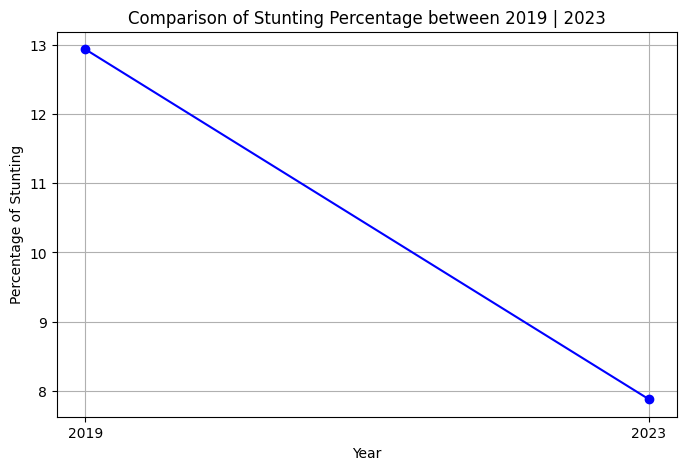

In [223]:
# Define the data
years = ["2019", "2023"]

# Sum the values of "Pendek (anak)" for each year
komparasi_stunting = [
    stunting_2019[
        ("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)")
    ].mean(),
    stunting_2023[
        ("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)")
    ].mean(),
]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(years, komparasi_stunting, marker="o", color="blue", linestyle="-")

# Adding labels and title
plt.title("Comparison of Stunting Percentage between 2019 | 2023")
plt.xlabel("Year")
plt.ylabel("Percentage of Stunting")

# Show the plot
plt.grid(True)
plt.show()

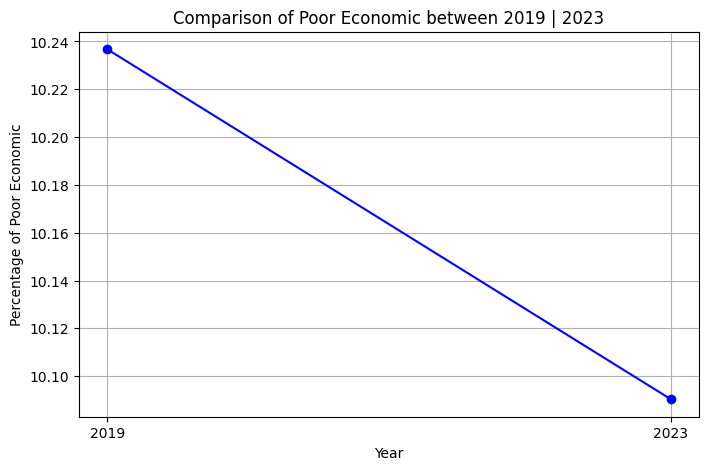

In [224]:
# Define the data
years = ["2019", "2023"]
kemiskinan_2019 = persentase_kemiskinan[("Persentase Penduduk Miskin 2019 (September)")]
kemiskinan_2023 = persentase_kemiskinan[("Persentase Penduduk Miskin 2023 (Maret)")]

# Sum the values of "Pendek (anak)" for each year
komparasi_kekayaan = [kemiskinan_2019.mean(), kemiskinan_2023.mean()]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(years, komparasi_kekayaan, marker="o", color="blue", linestyle="-")

# Adding labels and title
plt.title("Comparison of Poor Economic between 2019 | 2023")
plt.xlabel("Year")
plt.ylabel("Percentage of Poor Economic")

# Show the plot
plt.grid(True)
plt.show()

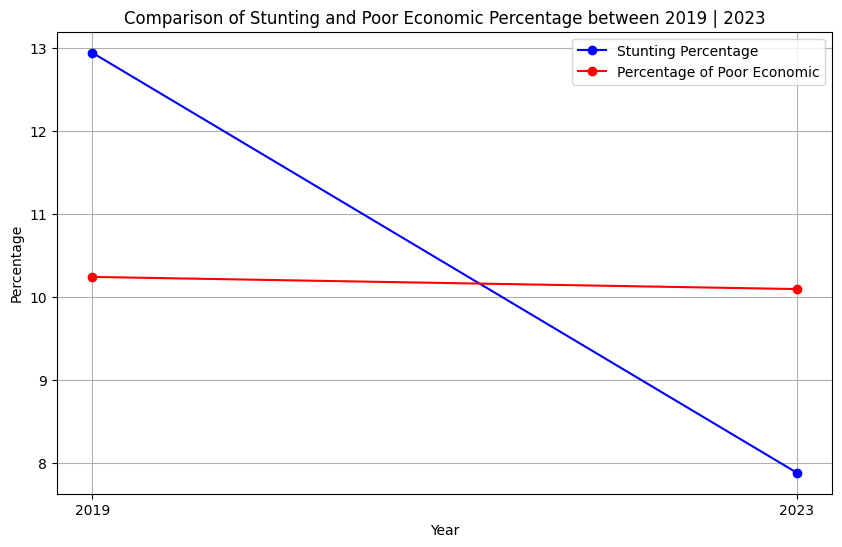

In [225]:
# Define the data for stunting percentage comparison
years = ["2019", "2023"]
komparasi_stunting = [
    stunting_2019[
        ("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)")
    ].mean(),
    stunting_2023[
        ("Persentase Kasus Stunting (%)", "Persentase Kasus Stunting (%)")
    ].mean(),
]

# Define the data for economic comparison
kemiskinan_2019 = persentase_kemiskinan[("Persentase Penduduk Miskin 2019 (September)")]
kemiskinan_2023 = persentase_kemiskinan[("Persentase Penduduk Miskin 2023 (Maret)")]
komparasi_kekayaan = [kemiskinan_2019.mean(), kemiskinan_2023.mean()]

# Plotting both sets of data
plt.figure(figsize=(10, 6))

# Plot stunting percentage data
plt.plot(
    years,
    komparasi_stunting,
    marker="o",
    color="blue",
    linestyle="-",
    label="Stunting Percentage",
)

# Plot economic comparison data
plt.plot(
    years,
    komparasi_kekayaan,
    marker="o",
    color="red",
    linestyle="-",
    label="Percentage of Poor Economic",
)

# Adding labels and title
plt.title("Comparison of Stunting and Poor Economic Percentage between 2019 | 2023")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()  # Show legend with labels

# Show the plot
plt.grid(True)
plt.show()

In [226]:
# Define the stunting percentage and poor economic data
stunting_percentage = np.array(komparasi_stunting)
poor_economic_percentage = np.array(komparasi_kekayaan)

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(stunting_percentage, poor_economic_percentage)
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 1.0


### Insigt 3

We see from the chart and confirmed by the correlation coefficient above that <u>Percentage of Poverty is Affecting The Percentage of Stunting.</u> We can see that the percentage of stunting is continue to decrease while the percentage of poverty is also decreasing.

## 3. Perkembangan Stunting 5 Tahun ke Depan


In [227]:
stunting_2019.columns

MultiIndex([(                           'No',                            'No'),
            (                     'Provinsi',                      'Provinsi'),
            (         'Jumlah Balita (anak)',          'Jumlah Balita (anak)'),
            (                     'Stunting',                 'Pendek (anak)'),
            (                     'Stunting',          'Sangat Pendek (anak)'),
            ('Persentase Kasus Stunting (%)', 'Persentase Kasus Stunting (%)')],
           )

In [228]:
# Extract stunting percentage data (Persentase Kasus Stunting (%))
stunting_percentage_2019 = stunting_2019[('Persentase Kasus Stunting (%)', 'Persentase Kasus Stunting (%)')]
stunting_percentage_2023 = stunting_2023[('Persentase Kasus Stunting (%)', 'Persentase Kasus Stunting (%)')]

# Calculate growth rate from 2019 to 2023
growth_rate = (stunting_percentage_2023 - stunting_percentage_2019) / (2023 - 2019)

# Average growth rate
average_growth_rate = growth_rate.mean()

# Last observed stunting percentage (2023)
last_observed_stunting_percentage = stunting_percentage_2023.iloc[-1]

# Project stunting trend for the next 5 years
future_years = range(2024, 2029)
forecasted_stunting_percentages = []
for year in future_years:
    forecasted_stunting_percentage = last_observed_stunting_percentage + average_growth_rate * (year - 2023)
    forecasted_stunting_percentages.append(forecasted_stunting_percentage)

# Create DataFrame for forecasted data
forecast_df = pd.DataFrame({'Year': future_years, 'Stunting_Percentage_Forecast': forecasted_stunting_percentages})

forecast_df

,Year,Stunting_Percentage_Forecast
0,2024,5.788710
1,2025,4.477419
2,2026,3.166129
3,2027,1.854839
4,2028,0.543548


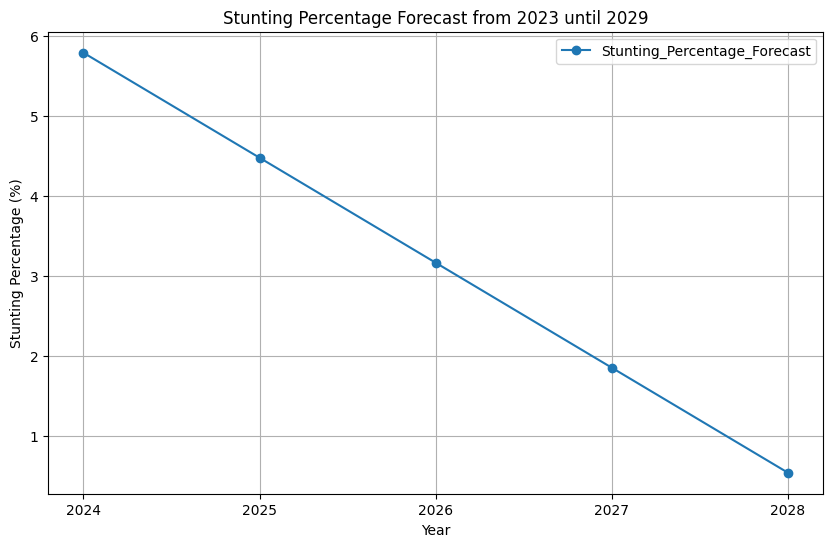

In [229]:
# Plot the forecasted data directly from the forecast_df DataFrame
forecast_df.plot(x='Year', y='Stunting_Percentage_Forecast', marker='o', figsize=(10, 6))
plt.title('Stunting Percentage Forecast from 2023 until 2029')
plt.xlabel('Year')
plt.ylabel('Stunting Percentage (%)')
plt.grid(True)
plt.xticks(future_years)
plt.show()


### Insight 4

With the function from stat model which is use as forecast() methode to predict the stunting percentage for 5 years ahead, we got a good news about this. <b>The Stunting Percentage will be under 1% on the 2028.</b> <br>
if government and people keep do stunting prevention like now. The government with <b>Segmented Help and Educated Public</b>

## 4. Prediksi Persentase Sebaran Stunting 2045 Jika Methode Penyelesaian Tidak Berubah


In [230]:
stunting_2019.columns

MultiIndex([(                           'No',                            'No'),
            (                     'Provinsi',                      'Provinsi'),
            (         'Jumlah Balita (anak)',          'Jumlah Balita (anak)'),
            (                     'Stunting',                 'Pendek (anak)'),
            (                     'Stunting',          'Sangat Pendek (anak)'),
            ('Persentase Kasus Stunting (%)', 'Persentase Kasus Stunting (%)')],
           )

In [231]:
# Extract stunting percentage data (Persentase Kasus Stunting (%))
stunting_percentage_2019 = stunting_2019[('Persentase Kasus Stunting (%)', 'Persentase Kasus Stunting (%)')]
stunting_percentage_2023 = stunting_2023[('Persentase Kasus Stunting (%)', 'Persentase Kasus Stunting (%)')]

# Calculate growth rate from 2019 to 2023
growth_rate = (stunting_percentage_2023 - stunting_percentage_2019) / (2023 - 2019)

# Average growth rate
average_growth_rate = growth_rate.mean()

# Last observed stunting percentage (2023)
last_observed_stunting_percentage = stunting_percentage_2023.iloc[-1]

# Project stunting trend until 2045
future_years = range(2024, 2045)
forecasted_stunting_percentages = []
for year in future_years:
    forecasted_stunting_percentage = last_observed_stunting_percentage + average_growth_rate * (year - 2023)
    forecasted_stunting_percentages.append(forecasted_stunting_percentage)

# Create DataFrame for forecasted data
forecast_df = pd.DataFrame({'Year': future_years, 'Stunting_Percentage_Forecast': forecasted_stunting_percentages})

forecast_df

,Year,Stunting_Percentage_Forecast
0,2024,5.788710
1,2025,4.477419
2,2026,3.166129
3,2027,1.854839
4,2028,0.543548
5,2029,-0.767742
6,2030,-2.079032
7,2031,-3.390323
8,2032,-4.701613
9,2033,-6.012903


### Insight 5
The projection that in 2045 Indonesia will be free from stunting does not seem impossible to achieve if the positive trend in 2019-2023 continues at least until 2029

## 5. Prediksi Kapan Stunting Berakhir


In [232]:
# Initial values
current_year = 2023
last_observed_stunting_percentage = stunting_percentage_2023.iloc[-1]
forecasted_stunting_percentage = last_observed_stunting_percentage
future_years = range(2024, 2051)  # Projection until 2050

# Initialize an empty DataFrame to store forecasted data
forecast_df = pd.DataFrame(columns=['Year', 'Stunting_Percentage_Forecast'])

# Project stunting trend until stunting percentage reaches or approaches 0
while forecasted_stunting_percentage > 0.1:  # Choose a threshold close to 0
    current_year += 1
    forecasted_stunting_percentage += average_growth_rate
    if forecasted_stunting_percentage < 0:
        forecasted_stunting_percentage = 0
    forecast_df = pd.concat([forecast_df, pd.DataFrame({'Year': [current_year], 'Stunting_Percentage_Forecast': [forecasted_stunting_percentage]})], ignore_index=True)

# Print the year when stunting is expected to end
print("Year when stunting is expected to end:", current_year)

# Print the forecasted stunting percentages
print(forecast_df)


Year when stunting is expected to end: 2029
   Year  Stunting_Percentage_Forecast
0  2024                      5.788710
1  2025                      4.477419
2  2026                      3.166129
3  2027                      1.854839
4  2028                      0.543548
5  2029                      0.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_19588\1451034691.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([forecast_df, pd.DataFrame({'Year': [current_year], 'Stunting_Percentage_Forecast': [forecasted_stunting_percentage]})], ignore_index=True)


### Insight 6
If the government and society continue to carry out the same consistent efforts, and there are no other unexpected things that change the trend of reducing stunting, then by 2029 it can be said that Indonesia will be almost stunting free.

# Overall Insight


## 6. Kesimpulannya, apakah cara efektif menghadapi stunting? dan kapan dapat terselesaikan dengan cara paling efektif tersebut?

#### Image Comparison Poverty Profile 2022 | 2023

In [10]:
# Print the current working directory to help with troubleshooting
print("Current working directory:", os.getcwd())

# Correct path using raw string for Windows paths
image_path = r"C:\Kuliah\Semester 4\Data Management\UTS\Profil Kemiskinan 2022 vs 2023.webp"

# Check if the file exists before attempting to open it
if os.path.exists(image_path):
    profil_kemiskinan_2022_2023 = Image.open(image_path)
    profil_kemiskinan_2022_2023.show()
else:
    print(f"File not found: {image_path}")


Current working directory: c:\Kuliah\Semester 4\Data Management\UTS


#### Overall Insight

From all of the insight above, we can see how effective the government help actually is. The program from government is already enough to prevent and even finish stunting. Beside that Educated Public about preventing stunting also play a really massive role <br>
However, Stunting free can be achieve if the positive program is keep going or even better improving. Here are something we could do to achieve <b style="color: green"> Indonesia Stunting Free</b>
<br>
<lo>
    <li>Segmented Help from government play a big role for helping people. It give a spesific solution for each public segment. <u style="color: yellow">Never do General Help (Unsegmented Help)</u></li>
    <li>Government cannot work alone on this program to fight stunting. Public also plays a big role, To prevent stunting, it must start with people who are aware and educated about how to handle and prevent stunting from the womb. <u style="color: yellow">Educated public is a must</u></li>
    <li>Buying proper food with good nutrition is hard for people with poverty / bad financial. Government should find a way how to help this people, for example <u>give them insentive</u> to get cheaper proper food woth good nutrition from <u>Koperasi</u>, or giving them <u>direct help as food, clean water, folic acid,</u> etc. to help them prevent stunting. <u style="color: yellow">People with poverty are vulnerable to stunting</u></li>
</lo>

<b style="color: green"> If the collaboration between Government, Education, and Public is always positive and cooperative, we can continue this positive trend. At least until 2029, we must collaborate and be educated for preventin stunting to achieve Indonesia Golden Generation 2045 Stunting Free. <b>